## Introduction to Atmospheric Radar Course - Practical 1

<img src="NCAS_national_centre_logo_transparent.png" alt="NCAS" style="width: 200px;"/>


## An Introduction to reading and interogating radar files with open source radar packages
### Part 1 - The Python-ARM Radar toolkit Py-ART

#### Overview
This notebook introduces the Python-ARM radar toolkit originally developed by the Atmospheric Radiation Measurement (ARM) User Facility. We cover how to read data files with Py-ART,  the data model used by Py-ART and how to use the data model to interogate basic information found within those files. Example files from the NCAS mobile X-band radar and the ??? radar are used in this notebook.

##### An introduction to Py-ART

Helmus, J.J. & Collis, S.M., (2016). The Python ARM Radar Toolkit (Py-ART), a Library for Working with Weather Radar Data in the Python Programming Language. Journal of Open Research Software. 4(1), p.e25. DOI: http://doi.org/10.5334/jors.119

- Official source code repository: https://github.com/ARM-DOE/pyart
- 
HTML documentation: https://arm-doe.github.io/pyart
/

In [1]:
import pyart

# Some helpful additional modules to load for examining the radar files / the data within during the notebook
import numpy as np
import matplotlib.pyplot as plt


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



##### Reading files with Py-ART

Py-ART is capable of reading radar data stored in a number of file formats, including Cf/Radial, Sigmet and NexRAD. Core integrated input/output functions are found within the **io** module, while some less well tested input/output functions are found within the **aux_io** module. This includes readers for additional readers for formats such as Odim_h5 and Rainbow. We can see the difference between the two modules by examining them within the notebook:

In [2]:
pyart.io?

Type:        module
String form: <module 'pyart.io' from '/home/users/dufton/software/miniconda3/envs/dufton_EA/lib/python3.9/site-packages/pyart/io/__init__.py'>
File:        ~/software/miniconda3/envs/dufton_EA/lib/python3.9/site-packages/pyart/io/__init__.py
Docstring:  
Functions to read and write radar and grid data to and from a number of file
formats.

In most cases the :py:func:`pyart.io.read` function should be used to read
in radar data from a file. In certain cases the function the read function
for the format in question should be used.

In [3]:
pyart.aux_io?

Type:        module
String form: <module 'pyart.aux_io' from '/home/users/dufton/software/miniconda3/envs/dufton_EA/lib/python3.9/site-packages/pyart/aux_io/__init__.py'>
File:        ~/software/miniconda3/envs/dufton_EA/lib/python3.9/site-packages/pyart/aux_io/__init__.py
Docstring:  
Additional classes and functions for reading and writing data from a number
of file formats.

These auxiliary input/output routines are not as well polished as those in
:mod:`pyart.io`. They may require addition dependencies beyond those required
for a standard Py-ART install, use non-standard function parameter and naming,
are not supported by the :py:func:`pyart.io.read` function and are not fully
tested if tested at all. Please use these at your own risk.

Bugs in these function should be reported but fixing them may not be a
priority.

The aim of all reader functions within Py-ART is to take the data file and transfer it into a common radar object. We can see how this works by reading in our first example file. In this case we are using a CF/Radial formated file from the NCAS X-band mobile radar. Although we know how the file is formatted we can still use the generic ```pyart.io.read``` function to open the file, as Py-ART can distinguish file formats in the background.

In [4]:
example_file_1 = 'ncas-mobile-x-band-radar-1_sandwith_20191110-204252_SUR_v1.nc'
pyart.io.read(example_file_1)

This creates a core radar object. We'll save this with a variable name to allow us to investigate the data model used by Py-ART and find out some information about the data found within the file.

In [5]:
radar = pyart.io.read(example_file_1)

##### The Py-ART data model

The Py-ART data model holds the radar file, the fields within the file and its associated metadata within a ```pyart.Radar``` object.

To see which fields are found within this example file we can view the keys of the ```radar.fields``` attribute (the model stores fields and most other information within dictionary objects).

In [6]:
print(radar.fields.keys())

dict_keys(['CCOR', 'CCORv', 'DOP', 'DOPu', 'KDP', 'PhiDP', 'RhoHV', 'RhoHVu', 'SNR', 'SNRu', 'SNRv', 'SNRvu', 'SQI', 'SQIu', 'SQIv', 'SQIvu', 'V', 'Vu', 'Vv', 'Vvu', 'W', 'Wu', 'Wv', 'Wvu', 'ZDR', 'ZDRu', 'dBZ', 'dBZv', 'dBuZ', 'dBuZv', 'uKDP', 'uKDPu', 'uPhiDP', 'uPhiDPu'])


While these dictionary keys give us a hint at what the fields may contain we can use the **long_name** convention from CF along with some standard methods from python to gain a little more insight about all of these fields with a simple python loop.

In [7]:
for key in radar.fields.keys():
    print('{}: {}'.format(key, radar.fields[key]['long_name']))

CCOR: clutter_correction_ratio_from_horizontal_polarization
CCORv: clutter_correction_ratio_from_vertical_polarization
DOP: degree_of_polarization
DOPu: unfiltered_degree_of_polarization
KDP: specific_differential_phase_shift_derived_by_Rainbow_from_PhiDP
PhiDP: differential_phase_shift_filtered_by_Rainbow
RhoHV: co-polar_cross_correlation_coefficient
RhoHVu: unfiltered_co-polar_cross_correlation_coefficient
SNR: signal_to_noise_ratio_from_horizontal_polarization
SNRu: unfiltered_signal_to_noise_ratio_from_horizontal_polarization
SNRv: signal_to_noise_ratio_from_vertical_polarization
SNRvu: unfiltered_signal_to_noise_ratio_from_vertical_polarization
SQI: signal_quality_index_from_horizontal_polarization
SQIu: unfiltered_signal_quality_index_from_horizontal_polarization
SQIv: signal_quality_index_from_vertical_polarization
SQIvu: unfiltered_signal_quality_index_from_vertical_polarization
V: radial_velocity_from_horizontal_polarization
Vu: unfiltered_radial_velocity_from_horizontal_polar

Other possible options would be **standard_name** and **proposed_standard_name** depending on whether the field in question has an accepted standard name within the CF conventions (link). For example we can look at the field 'dBuZ' in more detail to see what other items are contained within its dictionary.

In [8]:
print(radar.fields['dBuZ'])

{'long_name': 'unfiltered_reflectivity_from_horizontal_polarization', 'proposed_standard_name': 'radar_equivalent_reflectivity_factor_h', 'units': 'dBZ', 'sampling_ratio': 1.0, '_FillValue': -9e+33, 'grid_mapping': 'grid_mapping', 'coordinates': 'time range', 'data': masked_array(
  data=[[34.5, 26.5, 23.5, ..., 12.5, 13.0, 15.0],
        [34.5, 26.0, 25.5, ..., 12.5, 13.0, 16.0],
        [34.5, 25.5, 28.0, ..., 14.0, 13.5, 15.0],
        ...,
        [34.5, 28.0, 32.5, ..., --, --, --],
        [34.5, 30.5, 28.5, ..., --, --, --],
        [34.5, 28.5, 28.5, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-9e+33,
  dtype=float32)}


In the case of 'dBuZ' it has a proposed standard name of 'radar_equivalent_reflectivity_factor_h' and units of 'dBZ'. We can also see the values of dBuZ are stored under the 'data' key. This is common for the majority of values within the radar object.

To gain a more complete picture of what is inside the radar object we can use the inbuilt Py-ART method ```.info```. First we'll interogate this to see what, if any options we can provide when calling the method.

In [9]:
radar.info?

Signature:
radar.info(
    level='standard',
    out=<ipykernel.iostream.OutStream object at 0x7fc8e08f6820>,
)
Docstring:
Print information on radar.

Parameters
----------
level : {'compact', 'standard', 'full', 'c', 's', 'f'}, optional
    Level of information on radar object to print, compact is
    minimal information, standard more and full everything.
out : file-like, optional
    Stream to direct output to, default is to print information
    to standard out (the screen).
File:      ~/software/miniconda3/envs/dufton_EA/lib/python3.9/site-packages/pyart/core/radar.py
Type:      method

Even the ```compact``` option provides a significant print out of the file. Feel free to experiment with the other options too. 

In [10]:
radar.info(level='compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: <ndarray of type: float64 and shape: (1,)>
antenna_transition: <ndarray of type: int8 and shape: (3600,)>
azimuth: <ndarray of type: float32 and shape: (3600,)>
elevation: <ndarray of type: float32 and shape: (3600,)>
fields:
	CCOR: <ndarray of type: float32 and shape: (3600, 1000)>
	CCORv: <ndarray of type: float32 and shape: (3600, 1000)>
	DOP: <ndarray of type: float32 and shape: (3600, 1000)>
	DOPu: <ndarray of type: float32 and shape: (3600, 1000)>
	KDP: <ndarray of type: float32 and shape: (3600, 1000)>
	PhiDP: <ndarray of type: float32 and shape: (3600, 1000)>
	RhoHV: <ndarray of type: float32 and shape: (3600, 1000)>
	RhoHVu: <ndarray of type: float32 and shape: (3600, 1000)>
	SNR: <ndarray of type: float32 and shape: (3600, 1000)>
	SNRu: <ndarray of type: float32 and shape: (3600, 1000)>
	SNRv: <ndarray of type: float32 and shape: (3600, 1000)>
	SNRvu: <ndarray of type: float32 and shape: (3600, 1000)>
	SQI: <n

#### Exercise 1

*(10 minutes in pairs)*

Using the information found in the ```radar.info``` print information and the dictionaries within the radar object answer the following questions about the example file:

1. Where was the radar located while collecting this data?
2. What is the gate spacing of the radar data and how many gates were collected for each ray?
3. What frequency and wavelength is the radar operating at?
4. What is the maximum uncorrected reflectivity recorded within the file? 
5. Who could you contact if you want more information about the radar files?

##### Answers

**1. Radar location**

Reading through the ```radar.info(level=compact)``` output we can answer this without any additional python calls. The "platform_location" tells us the latitude and longitude of the radar: 54 31 03 N (54.51761),  3 36 54 W (-3.61508). However it may also be useful to obtain this information pythonically (say in a script), so here we can see a couple of alternative solutions. Reading the metadata section also tells us that the radar is located at "Sandwith" which is a United Utilities reservoir in the UK (see "title" and "location_keywords").

In [11]:
print(radar.metadata['platform_location'])

54 31 03 N (54.51761),  3 36 54 W (-3.61508)


In [12]:
print(radar.latitude)
print(radar.longitude)
print('The radar is located at {}, {}'.format(radar.latitude['data'][0], radar.longitude['data'][0]))

{'long_name': 'latitude', 'units': 'degrees_north', '_FillValue': -9999.0, 'data': masked_array(data=[54.51761],
             mask=False,
       fill_value=1e+20)}
{'long_name': 'longitude', 'units': 'degrees_east', '_FillValue': -9999.0, 'data': masked_array(data=[-3.61508],
             mask=False,
       fill_value=1e+20)}
The radar is located at 54.51761, -3.61508


**2. Radar gate spacing**

The radar gate spacing isn't found within the instrument parameters. We can find the number of gates as an individual attribute of the radar object (```radar.ngates```) but need to intergoate the radar range attribute to find the gate spacing. The length of the 'range' attribute also indicates the number of gates within the file.

In [13]:
print(' The radar object has {} range gates.'.format(radar.ngates))

 The radar object has 1000 range gates.


In [14]:
radar.range['units']

'meters'

Text(0.5, 0, 'Range from the radar (meters)')

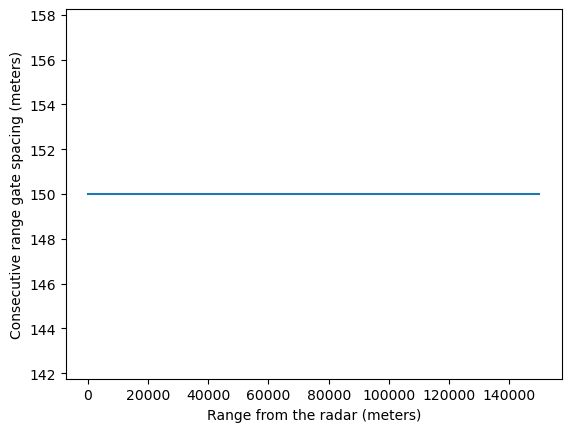

In [15]:
# Lets plot the difference between consecutive range gates in the range attribute as a function of range. This should be constant.

plt.plot(radar.range['data'][1:], radar.range['data'][1:]-radar.range['data'][:-1])
plt.ylabel('Consecutive range gate spacing ({})'.format(radar.range['units']))
plt.xlabel('Range from the radar ({})'.format(radar.range['units']))

This shows us that the gate spacing is 150 metres. Unless the precision of the data within the file leads to rounding errors the following code snippets would be sensible for finding this for use within a script:

In [16]:
gate_spacing = radar.range['data'][1]-radar.range['data'][0] # Take the first difference
print(gate_spacing)

gate_spacing = np.nanmean(radar.range['data'][1:]-radar.range['data'][:-1]) # Take the mean of all consecutive differences
print(gate_spacing)


150.0
150.0


**3. Frequency and wavelength**

We can see that frequency is contained within the instrument parameters attribute of the radar object (using ```radar.info```). We can start by investigating that.

In [17]:
radar.instrument_parameters['frequency']

{'long_name': 'transmission_frequency',
 'units': 's-1',
 '_FillValue': -9999.0,
 'meta_group': 'instrument_parameters',
 'data': masked_array(data=[9.40083e+09],
              mask=False,
        fill_value=1e+20,
             dtype=float32)}

The data field contains a single value of 9.40083e+09 with a unit of s-1, which is 9.4GHz. Wavelegnth isn't stored within the parameters but we know that wavelength and frequency are inversely proportional to one another. Therefore we can calculate the wavelegnth using the frequency and the speed of light within the atmopshere (299,702,547 meters per second). 

In [18]:
speed_of_light = 299702547
radar_frequency = radar.instrument_parameters['frequency']['data'][0]
wavelength = speed_of_light/radar_frequency
print('The radar wavelength is {:.4f} metres'.format(wavelength))

The radar wavelength is 0.0319 metres


**4. Maximum reflectivity**

To find the maximum radar reflectivity stored within the file we need to identify a suitable radar field to use and then use a numpy function to determine the maximum value found within that data. Going back to printing the fields and long names earlier we can see 4 potential options:

- dBZ: reflectivity from horizontal polarisation
- dBuZ: unfiltered reflectivity from horizontal polarisation 
- dBZv: reflectivity from vertical polarisation
- dBuZv: unfiltered reflectivity from vertical polarisation

As the question is non-specific in terms of either polarisation or filtering we will investigate all 4 fields to find the maximum (both polarisation and filtering will be covered later in the course).
so 

In [19]:
# Define a list of the fields we are interested in
reflectivity_fields = ['dBZ', 'dBuZ', 'dBZv', 'dBuZv']
# Loop throught the fields to find the maximum in each field
for reflectivity_field in reflectivity_fields:
    max_reflectivity = np.max(radar.fields[reflectivity_field]['data'])
    print(reflectivity_field,': ', max_reflectivity, 'dBZ')

dBZ :  56.0 dBZ
dBuZ :  75.0 dBZ
dBZv :  54.5 dBZ
dBuZv :  77.0 dBZ


**5. Contact details**

There are a range of contact details to choose from in the instrument metadata for this file. The question provides a useful reminder that in addition to the data they contain file can also contain additional information to help with their use / where to find help if something isn't clear.

In [20]:
print(radar.metadata['project_principle_investigator_contact'])
print(radar.metadata['creator_email'])

ryan.neely@ncas.ac.uk
lindsay.bennett@ncas.ac.uk


The options available will change from file to file depending on who they've been created by and their intended use. Another option for help in this case would be the 'references' section.

In [21]:
print(radar.metadata['references'])

https://doi.org/10.5194/amt-11-6481-2018


#### Working with the data in the radar files - Considering the minimum detectable signal

In the Radar Fundamentals lecture we covered the ...

If we examine a simplified form of the radar equation again we can see that the conversion of the average power received by the radar, $P_r$, to equivalent reflectivity factor, $Z$, depends on the radar calibraton constant ($C$) and the range of the observation from the radar, $r$.  

$Z = C + 20.log_{10}(r) + 10.log_{10}(P_r)$



In [23]:
radar.radar_calibration['r_calib_radar_constant_h']

{'long_name': 'calibrated_radar_constant_h_channel',
 'units': 'db',
 'meta_group': 'radar_calibration',
 '_FillValue': -9999.0,
 'data': masked_array(data=[72.832],
              mask=False,
        fill_value=1e+20,
             dtype=float32)}

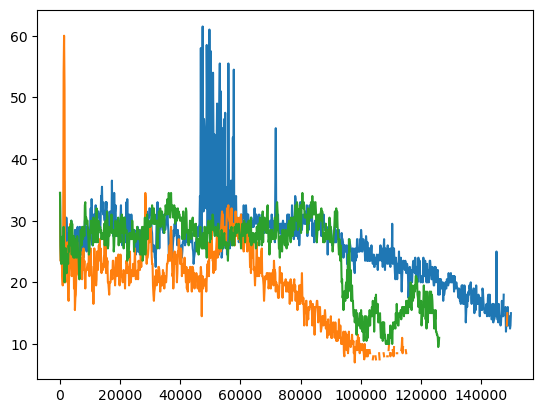

In [24]:
plt.plot(radar.range['data'],radar.fields['dBuZ']['data'][0])
plt.plot(radar.range['data'],radar.fields['dBuZ']['data'][10])
plt.plot(radar.range['data'],radar.fields['dBuZ']['data'][100])

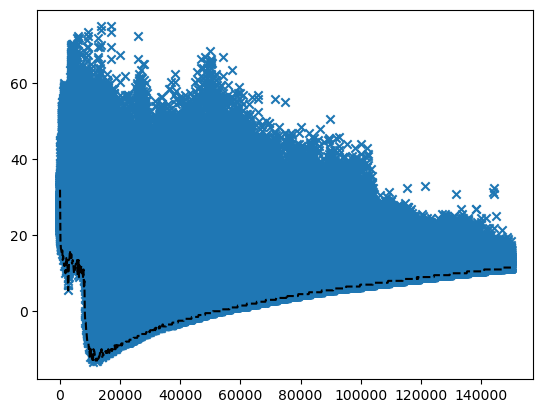

In [25]:
plt.scatter(np.tile(radar.range['data'],radar.nrays),radar.fields['dBuZ']['data'].flatten(),marker='x')
plt.plot(radar.range['data'],np.nanmin(radar.fields['dBuZ']['data'],axis=0),'k--')

In [26]:
C = radar.radar_calibration['r_calib_radar_constant_h']['data'][0]
Ri = np.tile(radar.range['data']/1000.0,radar.nrays).reshape(radar.nrays,radar.ngates)
Pr = radar.fields['dBuZ']['data']-20*np.log10(Ri)-C


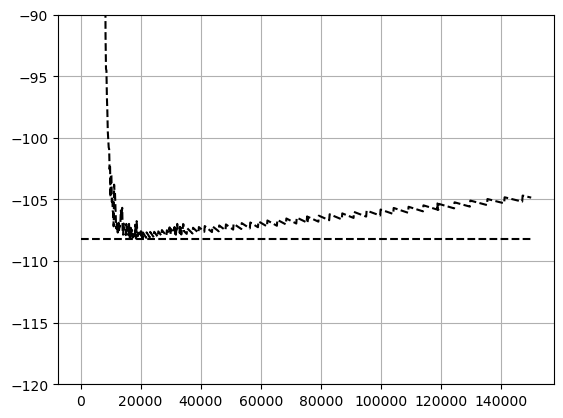

In [31]:
plt.plot(radar.range['data'],np.nanmin(Pr, axis=0),'k--') # Plot the minimum received power observed vs distance from the radar
plt.hlines(np.nanmin(Pr),0,150000, color='k',linestyles='--') # Plot the minimum received power observed within the whole file
plt.ylim(-120,-90)
plt.grid()

#### Summary
Within this notebook, we have covered the basics of working with radar data using Py-ART, including:

- Reading in a file using pyart.io
- Investigating the ```Radar``` object
- Finding information within the ```Radar``` object
- Understanding the minimum detectable signal of radars using data from within the example file

##### What’s Next
- Using xradar in place of Py-ART (Practical 1 - Part 2)
- Examining some more example files (Practical 1 example exercises)
- Plotting data from the radar files (Practical 2)


##### Resources and References
